# 1. Libraries

In [36]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# 2. Load data

In [37]:
merged = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/sil_nivel_merged.csv', index_col=0, parse_dates=True)

# 3. Normalization

In [38]:
merged_copy = merged.copy()
merged_copy['sil_std'] = (merged_copy['sil'] - merged_copy['sil'].mean()) / merged['sil'].std()
merged_copy['nivel_std'] = (merged_copy['nivel'] - merged_copy['nivel'].mean()) / merged['nivel'].std()
merged_real=merged_copy[['sil', 'nivel']]
merged_std=merged_copy[['sil_std', 'nivel_std']]

# 4. Cross-Correlation

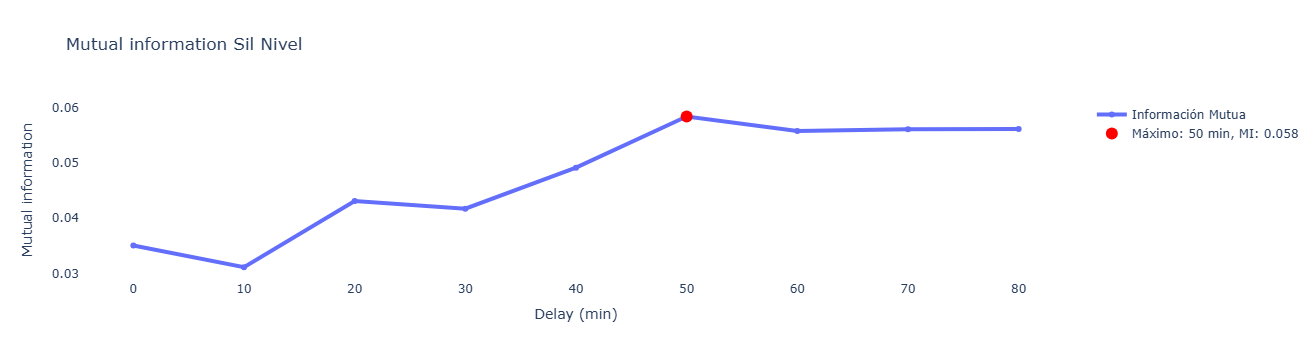

In [39]:
MIN_DELAY_MINUTES = 0  
MAX_DELAY_MINUTES = 80  
STEP = 10          

delays_minutes = np.arange(MIN_DELAY_MINUTES, MAX_DELAY_MINUTES + STEP, STEP)
delays_steps = delays_minutes // 10  

mi_values = []
for d in delays_steps:
    sil_shifted = merged_std['sil_std'].shift(d)
    df_temp = pd.DataFrame({
        'nivel_std': merged_std['nivel_std'],
        'sil_shifted': sil_shifted
    }).dropna()
    
    if len(df_temp) > 0:
        X = df_temp['nivel_std'].values.reshape(-1, 1)
        y_vals = df_temp['sil_shifted'].values
        mi = mutual_info_regression(X, y_vals, random_state=0)[0]
    else:
        mi = np.nan
    mi_values.append(mi)

mi_values = np.array(mi_values)

best_idx = np.nanargmax(mi_values)
best_delay_minutes = delays_minutes[best_idx]
best_mi = mi_values[best_idx]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=delays_minutes,
    y=mi_values,
    mode='lines+markers',
    name='Información Mutua',
    line=dict(width=4)  # Engrosar la línea
))
fig.add_trace(go.Scatter(
    x=[best_delay_minutes],
    y=[best_mi],
    mode='markers',
    marker=dict(color='red', size=12),
    name=f'Máximo: {best_delay_minutes} min, MI: {best_mi:.3f}'
))

fig.update_layout(
    title="Mutual information Sil Nivel",
    xaxis_title="Delay (min)",
    yaxis_title="Mutual information",
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

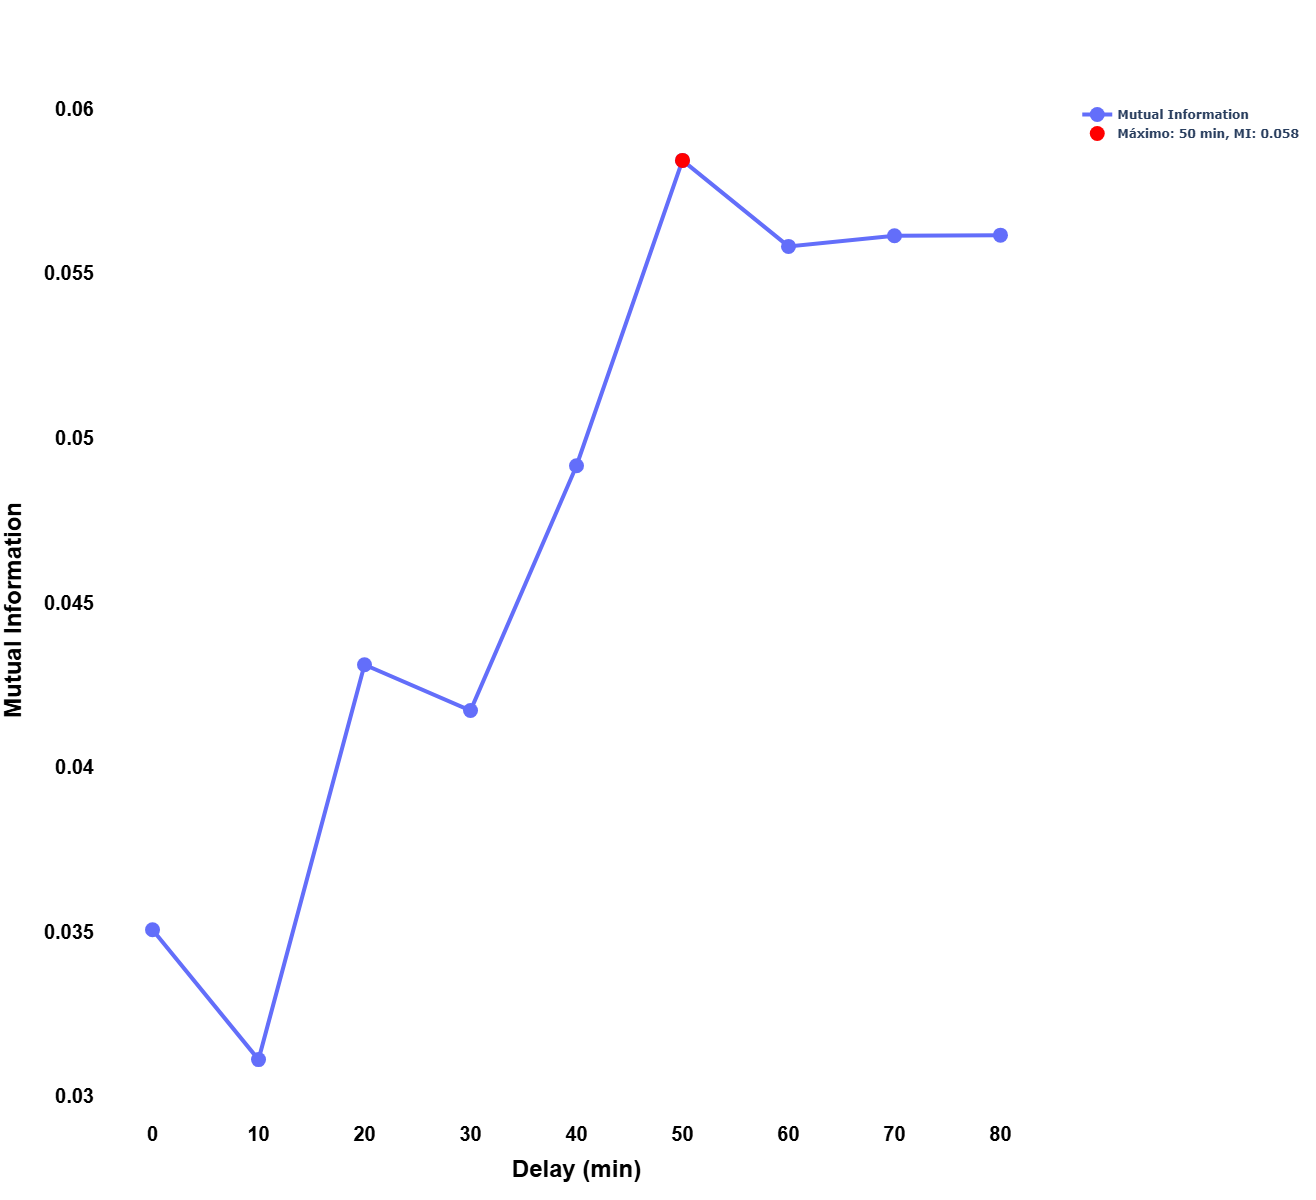

In [40]:
MIN_DELAY_MINUTES = 0  
MAX_DELAY_MINUTES = 80  
STEP = 10          

delays_minutes = np.arange(MIN_DELAY_MINUTES, MAX_DELAY_MINUTES + STEP, STEP)
delays_steps = delays_minutes // 10  

mi_values = []
for d in delays_steps:
    sil_shifted = merged['sil'].shift(d)
    df_temp = pd.DataFrame({
        'nivel': merged['nivel'],
        'sil_shifted': sil_shifted
    }).dropna()
    
    if len(df_temp) > 0:
        X = df_temp['nivel'].values.reshape(-1, 1)
        y_vals = df_temp['sil_shifted'].values
        mi = mutual_info_regression(X, y_vals, random_state=0)[0]
    else:
        mi = np.nan
    mi_values.append(mi)

mi_values = np.array(mi_values)

# Encontrar el mejor índice y valor de MI
best_idx = np.nanargmax(mi_values)
best_delay_minutes = delays_minutes[best_idx]
best_mi = mi_values[best_idx]

# Crear la figura
fig = go.Figure()

# Agregar la línea con puntos
fig.add_trace(go.Scatter(
    x=delays_minutes,
    y=mi_values,
    mode='lines+markers',
    marker=dict(size=15),  # Tamaño de los marcadores
    name='<b>Mutual Information</b>',
    line=dict(width=4)  # Engrosar la línea
))

# Agregar el punto máximo en rojo
fig.add_trace(go.Scatter(
    x=[best_delay_minutes],
    y=[best_mi],
    mode='markers',
    marker=dict(color='red', size=15),  # Hacerlo más visible
    name=f'<b>Máximo: {best_delay_minutes} min, MI: {best_mi:.3f}</b>'
))

# Ajustar el diseño con tamaños más grandes y negrita
fig.update_layout(
    title=dict(
        font=dict(size=24, family="Arial", color="black")
    ),
    xaxis=dict(
        title=dict(
            text="<b>Delay (min)</b>", 
            font=dict(size=24, family="Arial", color="black", weight="bold")
        ),
        tickfont=dict(size=20, family="Arial", color="black", weight="bold")
    ),
    yaxis=dict(
        title=dict(
            text="<b>Mutual Information</b>", 
            font=dict(size=24, family="Arial", color="black", weight="bold")
        ),
        tickfont=dict(size=20, family="Arial", color="black", weight="bold")
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=1200,  # Ancho de la imagen
    height=1200  # Alto de la imagen
)

# Mostrar la figura
fig.show()

In [15]:


# Crear DataFrame con los valores de delay y mutual information
df_mi = pd.DataFrame({
    'Delay (min)': delays_minutes,
    'Mutual Information': mi_values
})

# Renombrar la columna de delay como "silX"
df_mi['Sil'] = df_mi['Delay (min)'].apply(lambda x: f"sil{x}")

# Seleccionar y reordenar columnas
df_mi = df_mi[['Sil', 'Mutual Information']]

# Mostrar la tabla
print(df_mi)


       Sil  Mutual Information
0     sil0            0.035058
1    sil10            0.031115
2    sil20            0.043113
3    sil30            0.041721
4    sil40            0.049159
5    sil50            0.058435
6    sil60            0.055821
7    sil70            0.056143
8    sil80            0.056164
9    sil90            0.055177
10  sil100            0.060434
11  sil110            0.061128
12  sil120            0.056185
13  sil130            0.056702
14  sil140            0.057940
15  sil150            0.057926
16  sil160            0.056691
17  sil170            0.053837
18  sil180            0.056226
